In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('pdb_data_seq.csv')
data.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [2]:
data['macromoleculeType'].unique()

array(['DNA/RNA Hybrid', 'DNA', 'Protein', 'Protein#DNA', 'DNA#RNA',
       'RNA', 'DNA#DNA/RNA Hybrid', nan, 'Protein#RNA',
       'RNA#DNA/RNA Hybrid', 'Protein#DNA/RNA Hybrid', 'Protein#DNA#RNA',
       'Protein#DNA#DNA/RNA Hybrid', 'Protein#RNA#DNA/RNA Hybrid'],
      dtype=object)

In [3]:
data = data.values

In [4]:
new_data = []
for i in range(len(data)):
    if data[i][4] == '':
        continue
    elif data[i][4] == 'DNA' or data[i][4]== 'Protein'or data[i][4] == 'RNA':
        new_data.append([data[i][2],data[i][4]])
    else:
        new_data.append([data[i][2],'Hybrid'])
        
new_data = np.array(new_data)
new_data.shape

(467304, 2)

In [49]:
import csv

with open('pdb_processed.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(new_data)

In [5]:
for i in new_data:
    print(i[0])
    break
a= new_data[905][0]


CCGGCGCCGG


In [6]:
raw_data = []
raw_label = []
for a in new_data:
    b = []
    tmp = a[0]
    tmp_lab = a[1]
    for i in range(0, len(tmp), 3):
        b.append(tmp[i:i+3])
    raw_data.append(b)
    raw_label.append(tmp_lab)

In [19]:
for n, i in enumerate(raw_label):
    if i == 'Protein':
        raw_label[n] = 0
    elif i == 'DNA':
        raw_label[n] = 1
    elif i == 'RNA':
        raw_label[n] = 2
    elif i == 'Hybrid':
        raw_label[n] = 3


In [7]:
set(raw_label)

{'DNA', 'Hybrid', 'Protein', 'RNA'}

In [8]:
%matplotlib inline
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


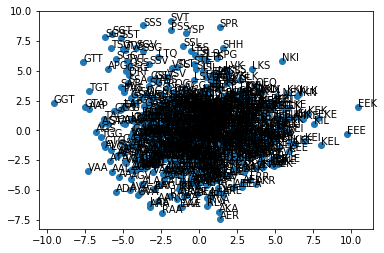

In [22]:
model = Word2Vec(raw_data, min_count=10000)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [9]:
model = Word2Vec(raw_data, min_count=1, size=300)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)

# access vector for one word
print(model['KEN'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Word2Vec(vocab=9414, size=300, alpha=0.025)


In [11]:
model = new_model
model.wv.syn0.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


(9414, 300)

In [12]:
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [13]:
def getAvgFeatureVecs(sequence, model, num_features):
    counter = 0
    SeqFeatureVecs = np.zeros((len(sequence),num_features),dtype="float32")
    for seq in sequence:

        if counter%1000 == 0:
            print("Sequence %d of %d"%(counter,len(sequence)))
            
        SeqFeatureVecs[counter] = featureVecMethod(seq, model, num_features)
        counter = counter+1
        
    return SeqFeatureVecs

In [14]:
trainDataVecs = getAvgFeatureVecs(raw_data, model, 300)

Sequence 0 of 467304


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


Sequence 1000 of 467304
Sequence 2000 of 467304
Sequence 3000 of 467304
Sequence 4000 of 467304
Sequence 5000 of 467304
Sequence 6000 of 467304
Sequence 7000 of 467304
Sequence 8000 of 467304
Sequence 9000 of 467304
Sequence 10000 of 467304
Sequence 11000 of 467304
Sequence 12000 of 467304
Sequence 13000 of 467304
Sequence 14000 of 467304
Sequence 15000 of 467304
Sequence 16000 of 467304
Sequence 17000 of 467304
Sequence 18000 of 467304
Sequence 19000 of 467304
Sequence 20000 of 467304
Sequence 21000 of 467304
Sequence 22000 of 467304
Sequence 23000 of 467304
Sequence 24000 of 467304
Sequence 25000 of 467304
Sequence 26000 of 467304
Sequence 27000 of 467304
Sequence 28000 of 467304
Sequence 29000 of 467304
Sequence 30000 of 467304
Sequence 31000 of 467304
Sequence 32000 of 467304
Sequence 33000 of 467304
Sequence 34000 of 467304
Sequence 35000 of 467304
Sequence 36000 of 467304
Sequence 37000 of 467304
Sequence 38000 of 467304
Sequence 39000 of 467304
Sequence 40000 of 467304
Sequence 

Sequence 321000 of 467304
Sequence 322000 of 467304
Sequence 323000 of 467304
Sequence 324000 of 467304
Sequence 325000 of 467304
Sequence 326000 of 467304
Sequence 327000 of 467304
Sequence 328000 of 467304
Sequence 329000 of 467304
Sequence 330000 of 467304
Sequence 331000 of 467304
Sequence 332000 of 467304
Sequence 333000 of 467304
Sequence 334000 of 467304
Sequence 335000 of 467304
Sequence 336000 of 467304
Sequence 337000 of 467304
Sequence 338000 of 467304
Sequence 339000 of 467304
Sequence 340000 of 467304
Sequence 341000 of 467304
Sequence 342000 of 467304
Sequence 343000 of 467304
Sequence 344000 of 467304
Sequence 345000 of 467304
Sequence 346000 of 467304
Sequence 347000 of 467304
Sequence 348000 of 467304
Sequence 349000 of 467304
Sequence 350000 of 467304
Sequence 351000 of 467304
Sequence 352000 of 467304
Sequence 353000 of 467304
Sequence 354000 of 467304
Sequence 355000 of 467304
Sequence 356000 of 467304
Sequence 357000 of 467304
Sequence 358000 of 467304
Sequence 359

In [115]:
testDataVecs= trainDataVecs[0:1000]
valDataVecs = trainDataVecs[1000:2000]
trainDataVecs = trainDataVecs[2000:] 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainDataVecs, raw_label, test_size=0.20, random_state=290, shuffle=True)
len(y_test)

93461

In [20]:
# Fitting a random forest classifier to the training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100,verbose=2)
    
print("Fitting random forest to training data....")    
forest = forest.fit(X_train, y_train)

Fitting random forest to training data....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 21.6min finished


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = forest.predict(X_test)
train_accuracy = accuracy_score(y_train, forest.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy :: %0.4f"%(train_accuracy*100))
print("Test Accuracy  :: %0.4f"%(test_accuracy*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.8s finished


Train Accuracy :: 97.2611
Test Accuracy  :: 95.6538


In [22]:

from sklearn.metrics import classification_report
target_names = ['Protein','DNA','RNA','Hybrid']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Protein       0.89      0.79      0.84       720
         DNA       0.94      0.88      0.91     23143
         RNA       0.96      0.98      0.97     69118
      Hybrid       0.94      0.70      0.80       480

   micro avg       0.96      0.96      0.96     93461
   macro avg       0.93      0.84      0.88     93461
weighted avg       0.96      0.96      0.96     93461



In [19]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)